In [143]:
#Web page phishing detection using machine learning (random forest)

In [144]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [145]:
#put the dataset_phishing.csv file in a pandas dataframe

df = pd.read_csv('dataset_phishing.csv')
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [146]:
#checking the number of rows and columns and descriptive statistics
df.shape

(11430, 89)

In [147]:
df.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [149]:
#the last row is qualitative data "legitimate" or "phishing" so we need to convert it to numerical data 0 or 1

df['status'] = df['status'].map({'legitimate':0, 'phishing':1})
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank  status  
0             1          4       0  
1             1          2       1  
2             1          0       1  
3             0          3       0  
4             0          6       0  

[5 rows x 89 columns]

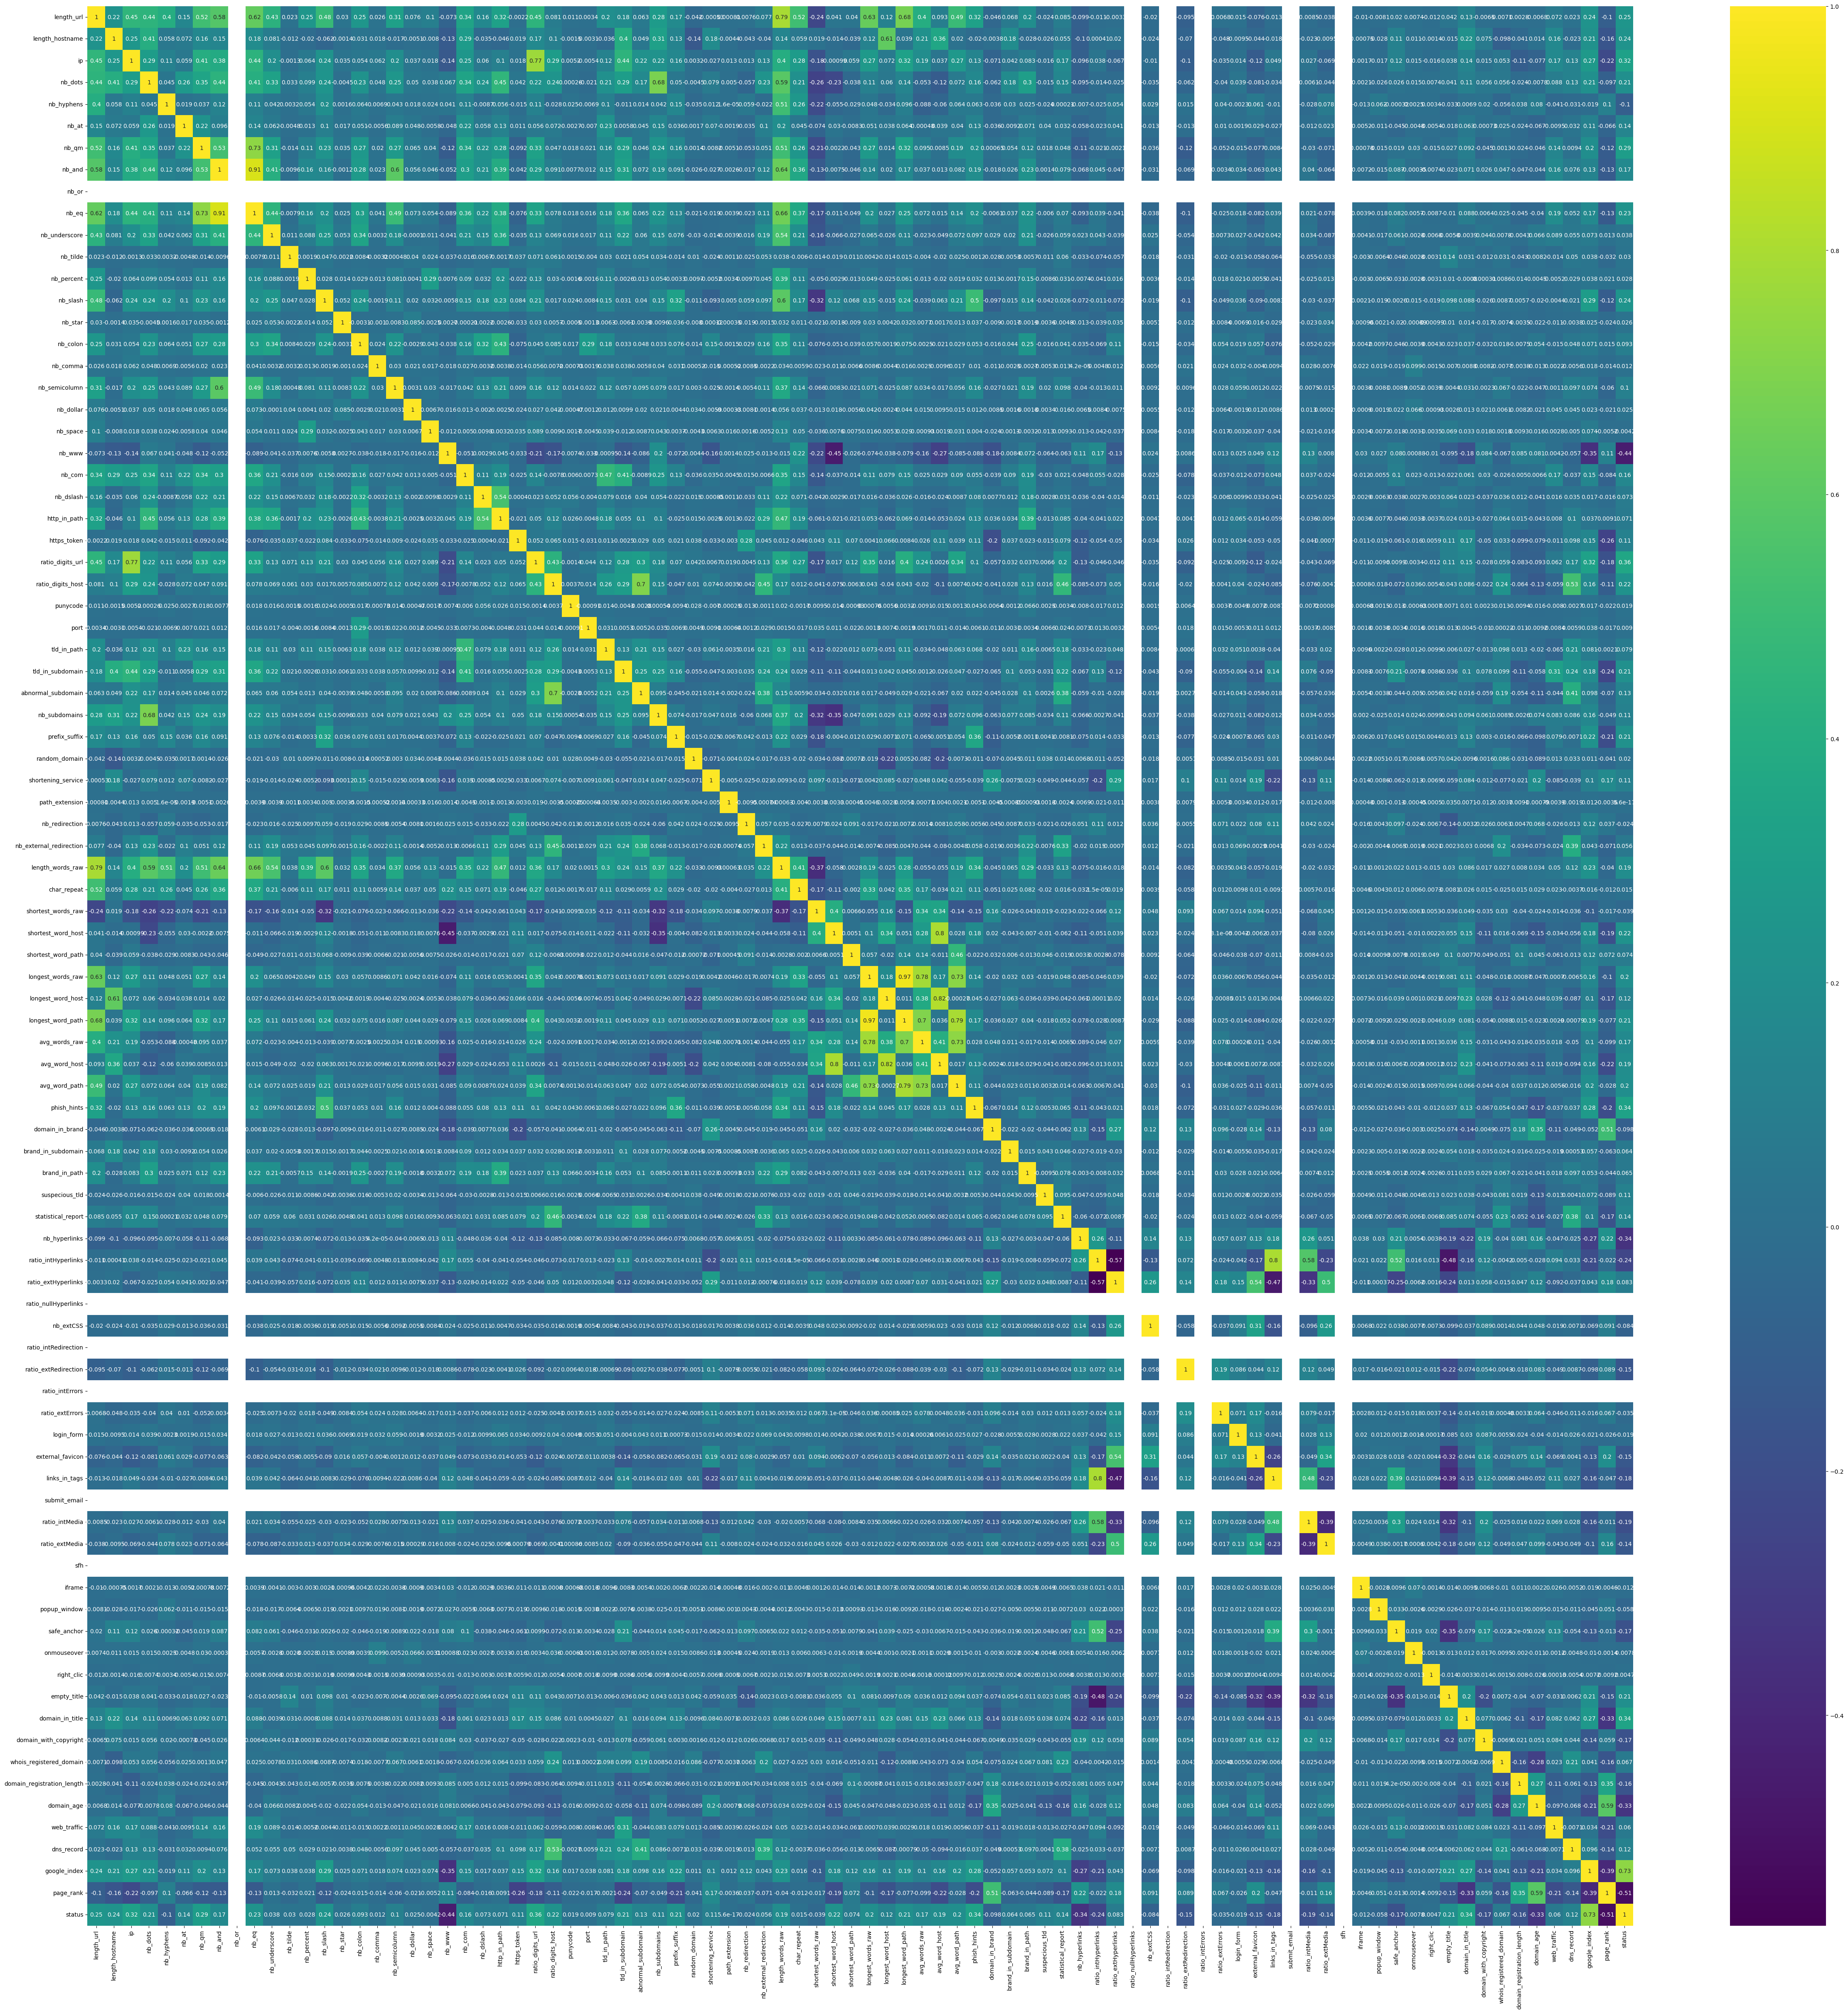

In [150]:
#Inspect correlation between features and identify features with high correlation use viridis color map

plt.figure(figsize=(60,60))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.savefig("heatmap.png")
plt.show()


#checking the distribution of the target variable


In [151]:
corr_matrix = df.corr()

In [152]:
corr_matrix.shape

(88, 88)

In [153]:
corr_matrix

length_url  length_hostname        ip   nb_dots  nb_hyphens  \
length_url         1.000000         0.223025  0.453961  0.443589    0.399564   
length_hostname    0.223025         1.000000  0.252013  0.408956    0.057702   
ip                 0.453961         0.252013  1.000000  0.288398    0.109860   
nb_dots            0.443589         0.408956  0.288398  1.000000    0.045099   
nb_hyphens         0.399564         0.057702  0.109860  0.045099    1.000000   
...                     ...              ...       ...       ...         ...   
web_traffic        0.072205         0.163238  0.167930  0.087969   -0.041464   
dns_record         0.023357        -0.023344  0.127823  0.126659   -0.031477   
google_index       0.236395         0.213990  0.270743  0.209616   -0.018828   
page_rank         -0.102582        -0.159342 -0.218968 -0.097312    0.104341   
status             0.248580         0.238322  0.321698  0.207029   -0.100107   

                    nb_at     nb_qm    nb_and  nb_or     nb_eq  ...  \
length_url       0.150739  0.520930  0.576268    NaN  0.621745  ...   
length_hostname  0.071793  0.162400  0.145617    NaN  0.183405  ...   
ip               0.059401  0.405434  0.383262    NaN  0.440972  ...   
nb_dots          0.263283  0.347411  0.435798    NaN  0.414902  ...   
nb_hyphens       0.018770  0.036804  0.120487    NaN  0.107050  ...   
...                   ...       ...       ...    ...       ...  ...   
web_traffic     -0.009459  0.143777  0.164797    NaN  0.187809  ...   
dns_record       0.031611  0.009441  0.076372    NaN  0.052159  ...   
google_index     0.113217  0.201260  0.129093    NaN  0.167385  ...   
page_rank       -0.066356 -0.123852 -0.126164    NaN -0.133089  ...   
status           0.142915  0.294319  0.170546    NaN  0.233386  ...   

                 domain_in_title  domain_with_copyright  \
length_url              0.125159              -0.006476   
length_hostname         0.217284               0.074707   
ip                      0.137716               0.014561   
nb_dots                 0.107789               0.055560   
nb_hyphens              0.006909               0.020297   
...                          ...                    ...   
web_traffic             0.081786               0.083888   
dns_record              0.062084               0.043817   
google_index            0.267465              -0.143655   
page_rank              -0.330810               0.058843   
status                  0.342807              -0.173098   

                 whois_registered_domain  domain_registration_length  \
length_url                     -0.007082                    0.002799   
length_hostname                -0.097794                   -0.041081   
ip                              0.053246                   -0.108869   
nb_dots                         0.056407                   -0.024117   
nb_hyphens                     -0.055794                    0.038163   
...                                  ...                         ...   
web_traffic                     0.022598                   -0.110435   
dns_record                      0.213899                   -0.060811   
google_index                    0.040633                   -0.134656   
page_rank                      -0.155990                    0.345751   
status                          0.066979                   -0.161719   

                 domain_age  web_traffic  dns_record  google_index  page_rank  \
length_url        -0.006798     0.072205    0.023357      0.236395  -0.102582   
length_hostname    0.013854     0.163238   -0.023344      0.213990  -0.159342   
ip                -0.077020     0.167930    0.127823      0.270743  -0.218968   
nb_dots           -0.007818     0.087969    0.126659      0.209616  -0.097312   
nb_hyphens         0.080104    -0.041464   -0.031477     -0.018828   0.104341   
...                     ...          ...         ...           ...        ...   
web_traffic       -0.096698     1.000000   -0.007113      0.03

In [154]:
corr_matrix["status"]

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [155]:
status_corr = corr_matrix["status"]

status_corr

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [156]:
#write a function that selects the features above a treshold correletion and returns the dataframe with the selected features and the features scores the df should be named result_df
#the dataframe should only be the features and the correlation score

def select_features(df, threshold):
    corr_matrix = df.corr()
    corr_matrix = corr_matrix["status"]
    corr_matrix = corr_matrix[corr_matrix > threshold]
    df_selected_features = corr_matrix.drop("status")
    df_selected_features = pd.DataFrame(df_selected_features)
    return df_selected_features


In [157]:
df_features = select_features(df, 0.1)

In [158]:
df_features

status
length_url          0.248580
length_hostname     0.238322
ip                  0.321698
nb_dots             0.207029
nb_at               0.142915
nb_qm               0.294319
nb_and              0.170546
nb_eq               0.233386
nb_slash            0.242270
nb_semicolumn       0.103554
nb_com              0.156284
https_token         0.114669
ratio_digits_url    0.356395
ratio_digits_host   0.224335
tld_in_subdomain    0.208884
abnormal_subdomain  0.128160
nb_subdomains       0.112891
prefix_suffix       0.214681
shortening_service  0.106120
length_words_raw    0.192010
shortest_word_host  0.223084
longest_words_raw   0.200147
longest_word_host   0.124516
longest_word_path   0.212709
avg_words_raw       0.167564
avg_word_host       0.193502
avg_word_path       0.197256
phish_hints         0.335393
suspecious_tld      0.110090
statistical_report  0.143944
empty_title         0.207043
domain_in_title     0.342807
dns_record          0.122119
google_index        0.731171

In [159]:
#show the names of the selected features without the status collumn
#put that in a list
features_list = df_features.index.tolist()
features_list




['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_slash',
 'nb_semicolumn',
 'nb_com',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'shortening_service',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'suspecious_tld',
 'statistical_report',
 'empty_title',
 'domain_in_title',
 'dns_record',
 'google_index']

In [160]:
X_selected = df[features_list]
X_selected

length_url  length_hostname  ip  nb_dots  nb_at  nb_qm  nb_and  nb_eq  \
0              37               19   0        3      0      0       0      0   
1              77               23   1        1      0      0       0      0   
2             126               50   1        4      0      1       2      3   
3              18               11   0        2      0      0       0      0   
4              55               15   0        2      0      0       0      0   
...           ...              ...  ..      ...    ...    ...     ...    ...   
11425          45               17   0        2      0      0       0      0   
11426          84               18   0        5      1      1       0      1   
11427         105               16   1        2      0      1       0      1   
11428          38               30   0        2      0      0       0      0   
11429         477               14   1       24      1      1       9      9   

       nb_slash  nb_semicolumn  ...  avg_words_raw  avg_word_host  \
0             3              0  ...       5.750000           7.00   
1             5              0  ...      15.750000          19.00   
2             5              0  ...       8.250000           8.40   
3             2              0  ...       5.000000           5.00   
4             5              0  ...       6.333333           5.00   
...         ...            ...  ...            ...            ...   
11425         4              0  ...       7.750000           6.00   
11426         5              0  ...       5.166667           6.50   
11427         5              0  ...       6.153846           5.50   
11428         3              0  ...      12.500000          12.50   
11429         4              9  ...       4.377778           2.75   

       avg_word_path  phish_hints  suspecious_tld  statistical_report  \
0           4.500000            0               0                   0   
1          14.666667            0               0                   0   
2           8.142857            0               0                   0   
3           0.000000            0               0                   0   
4           7.000000            0               0                   0   
...              ...          ...             ...                 ...   
11425       9.500000            0               0                   0   
11426       4.900000            0               0                   0   
11427       6.272727            0               0                   0   
11428       0.000000            0               0                   0   
11429       4.453488            3               0                   2   

       empty_title  domain_in_title  dns_record  google_index  
0                0                0           1             1  
1                0                1           0             1  
2                0                1           0             1  
3                0                1           0             0  
4                0                0           0             0  
...            ...              ...         ...           ...  
11425            0                0           0             0  
11426            0                1           0             1  
11427            0                0           0             1  
11428            0                1           0             0  
11429            0                1           1             1  

[11430 rows x 34 columns]

In [161]:
X_selected.shape

(11430, 34)

In [162]:
y = df['status']

In [163]:
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [164]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=40 , shuffle= True)

In [165]:
#model fitting for random forest

from sklearn.ensemble import RandomForestClassifier


In [180]:
model_random_forest = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=40)

In [181]:
model_random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=400, random_state=40)

In [182]:
#wirte a function that takes the model and the test data and returns the accuracy score and the confusion matrix and classification report and the roc curve and the roc auc score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

def model_evaluation(model, X_train,  X_test, y_train, y_test, train = True):
    if train:
        pred = model.predict(X_train)
        print('Train Result: ')
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train, pred)))
        print('Classification Report:')
        print(classification_report(y_train, pred))
        print('Confusion Matrix:')
        print(confusion_matrix(y_train, pred))
        print('ROC AUC Score: {0:.4f}\n'.format(roc_auc_score(y_train, pred)))
        fpr, tpr, _ = roc_curve(y_train, pred)
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, linestyle='--',color='orange')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.savefig('ROC')
        plt.show()

    elif train == False:
        
        pred = model.predict(X_test)
        print('Test Result:       ')
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test, pred)))
        print('Classification Report:')
        print(classification_report(y_test, pred))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, pred))
        print('ROC AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test, pred)))
        fpr, tpr, _ = roc_curve(y_test, pred)
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, linestyle='--',color='orange')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.savefig('ROC')
        plt.show()



Train Result: 
Accuracy Score: 0.9499

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4581
           1       0.95      0.95      0.95      4563

    accuracy                           0.95      9144
   macro avg       0.95      0.95      0.95      9144
weighted avg       0.95      0.95      0.95      9144

Confusion Matrix:
[[4372  209]
 [ 249 4314]]
ROC AUC Score: 0.9499



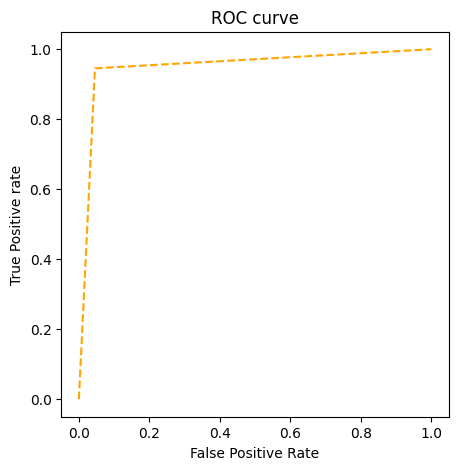

Test Result:       
Accuracy Score: 0.9283

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1134
           1       0.93      0.92      0.93      1152

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

Confusion Matrix:
[[1059   75]
 [  89 1063]]
ROC AUC Score: 0.9283



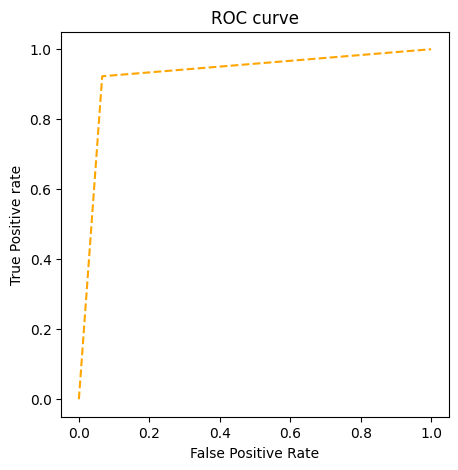

In [183]:
model_evaluation(model_random_forest, X_train, X_test, y_train, y_test, train = True)

model_evaluation(model_random_forest, X_train, X_test, y_train, y_test, train = False)

#write a function that takes the model and the test data and returns the accuracy score and the confusion matrix and classification report and the roc curve and the roc auc score

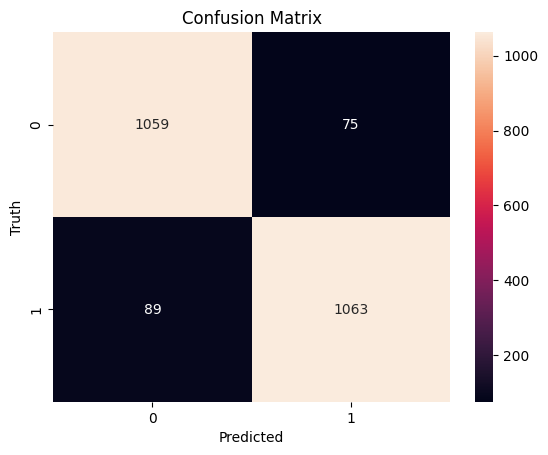

In [185]:
#what other visualizations can you do to show the performance of the model?
#answer: we can plot the ROC curve and the confusion matrix
#lets plot the confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion_matrix')
plt.show()


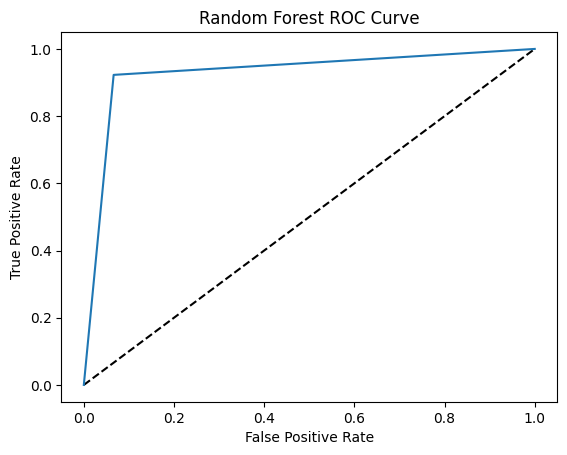

In [184]:
#what other visualizations can you do to show the performance of the model?
#answer: we can plot the ROC curve and the confusion matrix
#lets plot the ROC curve for the test data

from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model_random_forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.savefig('ROC')
plt.show()


/Users/raresnitu/miniconda3/envs/security_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


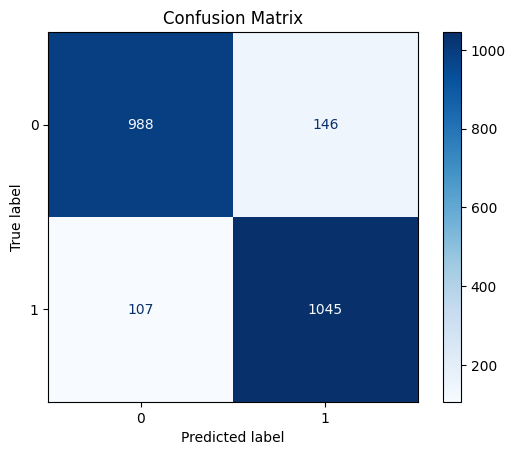

In [172]:
#plot the performance of the model on the training data and the test data
#plot the number of the websites identified as phishing and legitimate correctly and incorrectly

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_random_forest, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix')
plt.show()










In [173]:
#export the model as a pickle file

import pickle
with open('model_random_forest.pkl', 'wb') as file:
    pickle.dump(model_random_forest, file)
    




In [188]:
y_pred.shape

(2286,)

In [189]:
y_test.shape

(2286,)

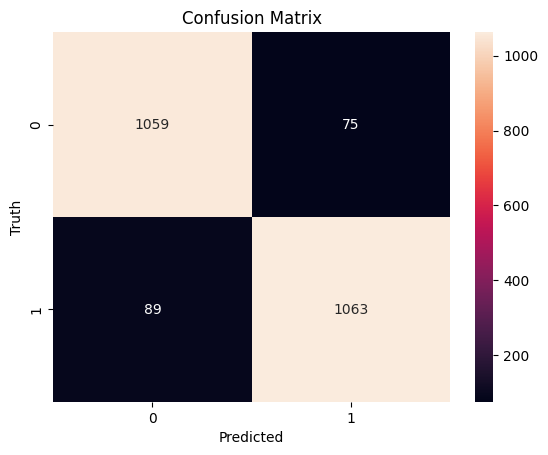

In [186]:
#print a graph of how many websites of phishing are not detected and how many of the legitimate websites are detected as phishing

y_pred = model_random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion_matrix')
plt.show()
